In [1]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from scipy.io import loadmat
from sklearn.metrics import classification_report, accuracy_score

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
def getFiles(basePath):
    files =  glob(basePath);
    files.sort();
    return files;

In [3]:
S_sentinel_bands_forest = getFiles("/tmp/shared/sentianel2dataset2/forest/*B?*.tiff");
S_sentinel_bands_forest

['/tmp/shared/sentianel2dataset2/forest/2022-06-30-00_00_2022-06-30-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/forest/2022-06-30-00_00_2022-06-30-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/forest/2022-06-30-00_00_2022-06-30-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/forest/2022-06-30-00_00_2022-06-30-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/forest/2022-06-30-00_00_2022-06-30-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/forest/2022-06-30-00_00_2022-06-30-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/forest/2022-06-30-00_00_2022-06-30-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/forest/2022-06-30-00_00_2022-06-30-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/forest/2022-06-30-00_00_2022-06-30-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/forest/2022-0

In [4]:
S_sentinel_bands_town = getFiles("/tmp/shared/sentianel2dataset2/town/*B?*.tiff");
S_sentinel_bands_town

['/tmp/shared/sentianel2dataset2/town/2022-07-11-00_00_2022-07-11-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/town/2022-07-11-00_00_2022-07-11-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/town/2022-07-11-00_00_2022-07-11-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/town/2022-07-11-00_00_2022-07-11-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/town/2022-07-11-00_00_2022-07-11-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/town/2022-07-11-00_00_2022-07-11-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/town/2022-07-11-00_00_2022-07-11-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/town/2022-07-11-00_00_2022-07-11-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/town/2022-07-11-00_00_2022-07-11-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/town/2022-07-11-00_00_2022-07-1

In [5]:
S_sentinel_bands_water = getFiles("/tmp/shared/sentianel2dataset2/water/*B?*.tiff");
S_sentinel_bands_water

['/tmp/shared/sentianel2dataset2/water/2022-07-13-00_00_2022-07-13-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/water/2022-07-13-00_00_2022-07-13-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/water/2022-07-13-00_00_2022-07-13-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/water/2022-07-13-00_00_2022-07-13-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/water/2022-07-13-00_00_2022-07-13-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/water/2022-07-13-00_00_2022-07-13-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/water/2022-07-13-00_00_2022-07-13-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/water/2022-07-13-00_00_2022-07-13-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/water/2022-07-13-00_00_2022-07-13-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/water/2022-07-13-00_00

In [6]:
S_sentinel_bands_sands = getFiles("/tmp/shared/sentianel2dataset2/sands/*B?*.tiff");
S_sentinel_bands_sands

['/tmp/shared/sentianel2dataset2/sands/2022-07-11-00_00_2022-07-11-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/sands/2022-07-11-00_00_2022-07-11-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/sands/2022-07-11-00_00_2022-07-11-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/sands/2022-07-11-00_00_2022-07-11-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/sands/2022-07-11-00_00_2022-07-11-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/sands/2022-07-11-00_00_2022-07-11-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/sands/2022-07-11-00_00_2022-07-11-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/sands/2022-07-11-00_00_2022-07-11-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/sands/2022-07-11-00_00_2022-07-11-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/sands/2022-07-11-00_00

In [7]:
S_sentinel_bands_field = getFiles("/tmp/shared/sentianel2dataset2/field/*B?*.tiff");
S_sentinel_bands_field

['/tmp/shared/sentianel2dataset2/field/2022-07-18-00_00_2022-07-18-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/field/2022-07-18-00_00_2022-07-18-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/field/2022-07-18-00_00_2022-07-18-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/field/2022-07-18-00_00_2022-07-18-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/field/2022-07-18-00_00_2022-07-18-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/field/2022-07-18-00_00_2022-07-18-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/field/2022-07-18-00_00_2022-07-18-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/field/2022-07-18-00_00_2022-07-18-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/field/2022-07-18-00_00_2022-07-18-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
 '/tmp/shared/sentianel2dataset2/field/2022-07-18-00_00

In [8]:
def getFilesArray(paths):
    l = []
    for i in paths:
        with rio.open(i, 'r') as f:
            l.append(f.read(1))
    arr_st = np.stack(l)
    return arr_st;

In [9]:
forest_st = getFilesArray(S_sentinel_bands_forest);

In [10]:
town_st = getFilesArray(S_sentinel_bands_town);

In [11]:
sands_st = getFilesArray(S_sentinel_bands_sands);

In [12]:
water_st = getFilesArray(S_sentinel_bands_water);

In [13]:
field_st = getFilesArray(S_sentinel_bands_field);

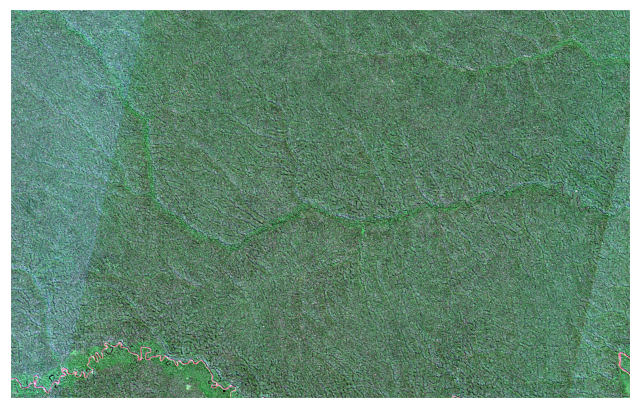

<AxesSubplot:>

In [14]:
ep.plot_rgb(
    forest_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.2,
    figsize=(8, 10),
    # title="RGB Composite Image with Stretch Applied",
)

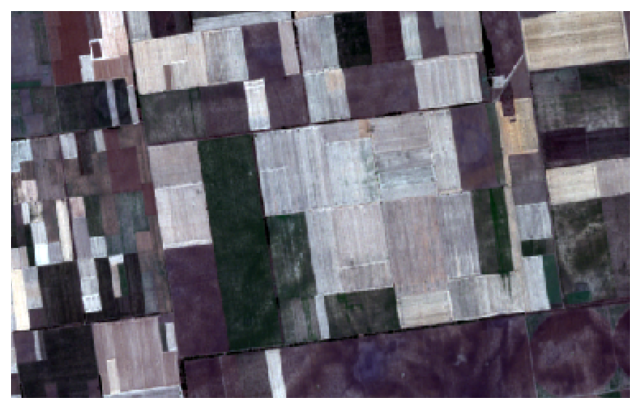

<AxesSubplot:>

In [15]:
ep.plot_rgb(
    field_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.2,
    figsize=(8, 10),
    # title="RGB Composite Image with Stretch Applied",
)

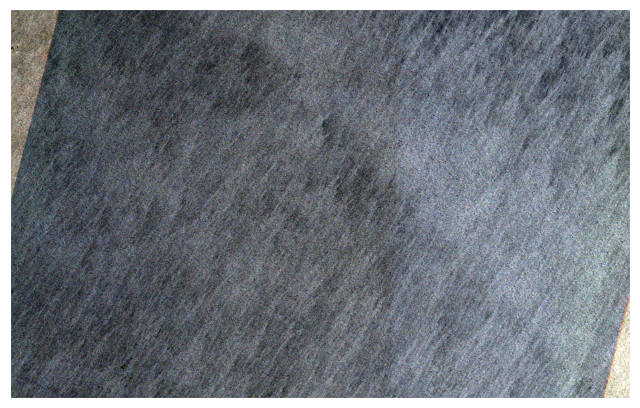

<AxesSubplot:>

In [16]:
ep.plot_rgb(
    water_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.2,
    figsize=(8, 10),
    # title="RGB Composite Image with Stretch Applied",
)

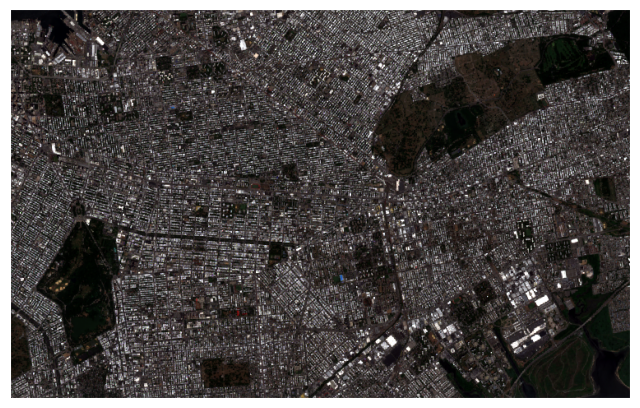

<AxesSubplot:>

In [17]:
ep.plot_rgb(
    town_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.2,
    figsize=(8, 10),
    # title="RGB Composite Image with Stretch Applied",
)

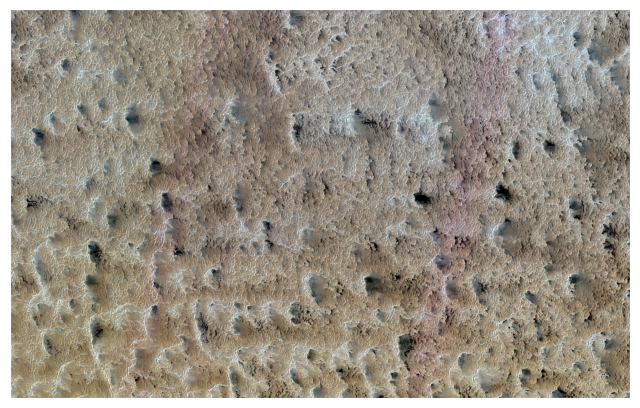

<AxesSubplot:>

In [18]:
ep.plot_rgb(
    sands_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.2,
    figsize=(8, 10),
    # title="RGB Composite Image with Stretch Applied",
)

In [19]:
x_forest = np.moveaxis(forest_st, 0, -1);
x_forest.shape

(784, 1250, 12)

In [20]:
x_sands = np.moveaxis(sands_st, 0, -1);
x_sands.shape

(784, 1250, 12)

In [21]:
x_town = np.moveaxis(town_st, 0, -1);
x_town.shape

(473, 754, 12)

In [22]:
x_water = np.moveaxis(water_st, 0, -1);
x_water.shape

(784, 1250, 12)

In [23]:
x_field = np.moveaxis(field_st, 0, -1);
x_field.shape

(236, 377, 12)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
def createVector(arr):
    arr1 = arr.reshape(-1, 12)
    scaler = StandardScaler().fit(arr1)

    X_scaled = scaler.transform(arr1)
    return X_scaled

In [26]:
forest_data = createVector(x_forest);
town_data = createVector(x_town);
sands_data = createVector(x_sands);
water_data = createVector(x_water);
field_data = createVector(x_field);

In [27]:
forest_data.shape

(980000, 12)

In [28]:
p = np.append(forest_data, town_data, axis=0)
p = np.append(p, sands_data, axis=0)
p = np.append(p, water_data, axis=0)
p = np.append(p, field_data, axis=0)
p.shape

(3385614, 12)

In [29]:
y_data_forest = np.full(forest_data.shape[0],1)
y_data_town = np.full(town_data.shape[0],2)
y_data_sands = np.full(sands_data.shape[0],3)
y_data_water = np.full(water_data.shape[0],4)
y_data_field = np.full(field_data.shape[0],5)

In [30]:
y_data = np.append(y_data_forest, y_data_town)
y_data = np.append(y_data, y_data_sands)
y_data = np.append(y_data, y_data_water)
y_data = np.append(y_data, y_data_field)
y_data.shape

(3385614,)

In [31]:
from sklearnex import patch_sklearn

patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(p, y_data, test_size=0.30, stratify = y_data)


In [33]:
print(f'X_train Shape: {X_train.shape}\nX_test Shape: {X_test.shape}\ny_train Shape: {y_train.shape}\ny_test Shape:{y_test.shape}')

X_train Shape: (2369929, 12)
X_test Shape: (1015685, 12)
y_train Shape: (2369929,)
y_test Shape:(1015685,)


## K-Nearest Neighbor Classifier (K-NNC)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

In [35]:
print(f"Accuracy: {accuracy_score(y_test, knn_pred)*100}")

Accuracy: 93.45318676558185


In [36]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           1       0.97      0.85      0.91    294000
           2       0.89      0.89      0.89    106993
           3       0.90      1.00      0.94    294000
           4       0.97      0.97      0.97    294000
           5       0.88      0.93      0.90     26692

    accuracy                           0.93   1015685
   macro avg       0.92      0.93      0.92   1015685
weighted avg       0.94      0.93      0.93   1015685



In [37]:
town_predict = knn.predict(town_data).reshape((473, 754))

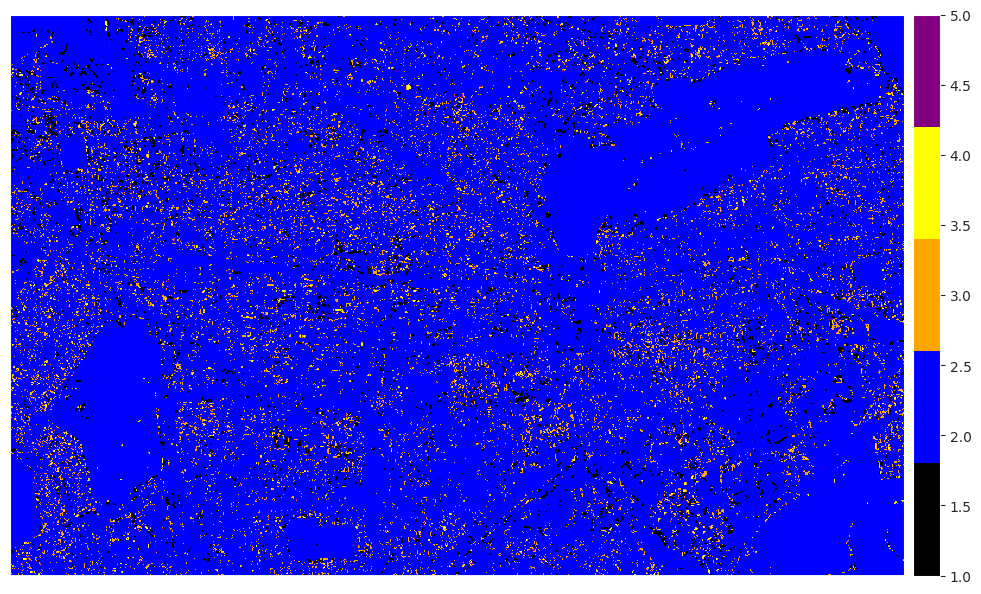

In [38]:
ep.plot_bands(town_predict,
              cmap=ListedColormap(['black', 'blue', 'orange', 'yellow', 'purple']))
plt.show()

In [39]:
forest_predict = knn.predict(forest_data).reshape((784, 1250))

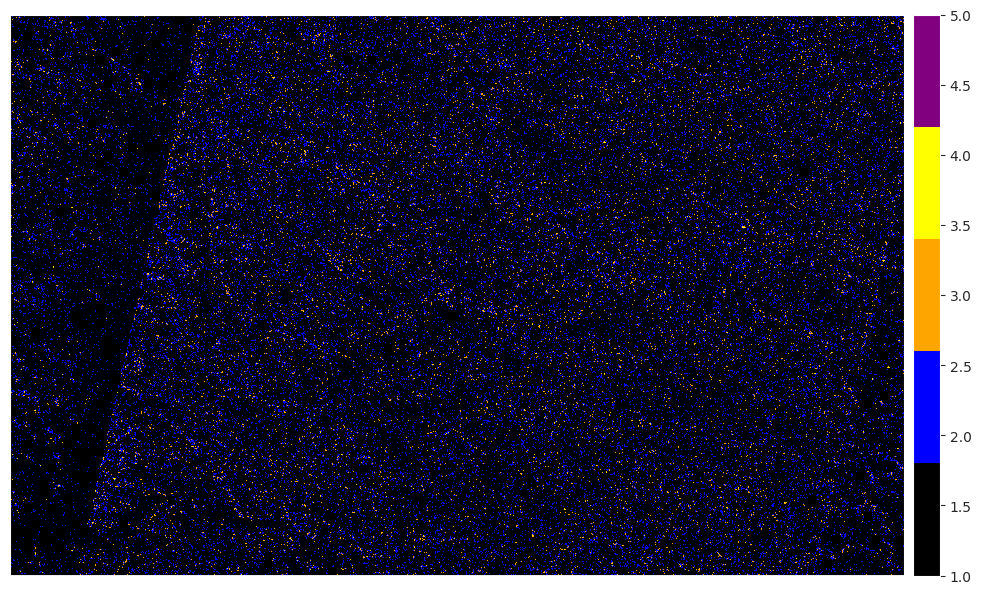

In [40]:
ep.plot_bands(forest_predict,
              cmap=ListedColormap(['black', 'blue', 'orange', 'yellow', 'purple']))
plt.show()

In [41]:
## Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
svm = SVC(C=4.0, kernel='rbf', degree=6, cache_size=1024)
svm.fit(X_train, y_train)